In [1]:
from fastai.tabular.all import load_pickle, patch
from src.constants import DATA_PATH, USER_PATH
from src.data import gedi_raster_matching
from src.processing.rf import split_data
from src.data import shape_processor
import geopandas as gpd
from fastai.tabular.all import *
from sklearn.metrics import *
from src.processing.rf import train
import importlib
importlib.reload(train)

2023-06-24 21:41:56,434 DEBUG: Logger /home/jk871/fire-regen/src/processing/rf/train.py already set up. [in get_logger at /home/jk871/fire-regen/src/utils/logging_util.py:51]


<module 'src.processing.rf.train' from '/home/jk871/fire-regen/src/processing/rf/train.py'>

In [2]:
sierras = gpd.read_file(f"{USER_PATH}/data/shapefiles/sierras.shp")
sierras_box = shape_processor.get_box(sierras)

In [3]:
train.logger.setLevel("DEBUG")

In [4]:
training_error = []
validation_error = []
test_error = []

training_error_rmse = []
test_error_rmse = []
for year in range(, 2021):
    r2_train, val_score, r2_test, rmse_train, rmse_test = train.train_rf(year, sierras_box, True, True)
    training_error.append(r2_train)
    validation_error.append(val_score)
    test_error.append(r2_test)

    training_error_rmse.append(rmse_train)
    test_error_rmse.append(rmse_test)

2023-06-24 21:42:23,802 DEBUG: Load training data from a pickle file. [in train_rf at /home/jk871/fire-regen/src/processing/rf/train.py:29]
2023-06-24 21:42:26,757 DEBUG: Split data into training and testing. [in train_rf at /home/jk871/fire-regen/src/processing/rf/train.py:41]
2023-06-24 21:42:29,107 DEBUG: Optimizing for log [in train_rf at /home/jk871/fire-regen/src/processing/rf/train.py:47]
2023-06-24 21:42:29,311 DEBUG: Prepare data for training. [in train_rf at /home/jk871/fire-regen/src/processing/rf/train.py:51]
2023-06-24 21:42:31,858 DEBUG: Start model training. [in train_rf at /home/jk871/fire-regen/src/processing/rf/train.py:63]
2023-06-24 21:43:28,391 DEBUG: Training complete. [in train_rf at /home/jk871/fire-regen/src/processing/rf/train.py:65]
2023-06-24 21:43:30,693 INFO: Year 1985 - Training rmse: 0.673676; R^2: 0.5266682684470515 [in train_rf at /home/jk871/fire-regen/src/processing/rf/train.py:72]
2023-06-24 21:43:30,695 INFO: Year 1985 - Validation error: 0.4507648

[-5.0, 0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0]
[-5.0, 0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0]


/tmp/ipykernel_2286521/3052113617.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels([str(x) for x in range(1980, 2021, 5)])
/tmp/ipykernel_2286521/3052113617.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels([str(x) for x in range(1980, 2021, 5)])


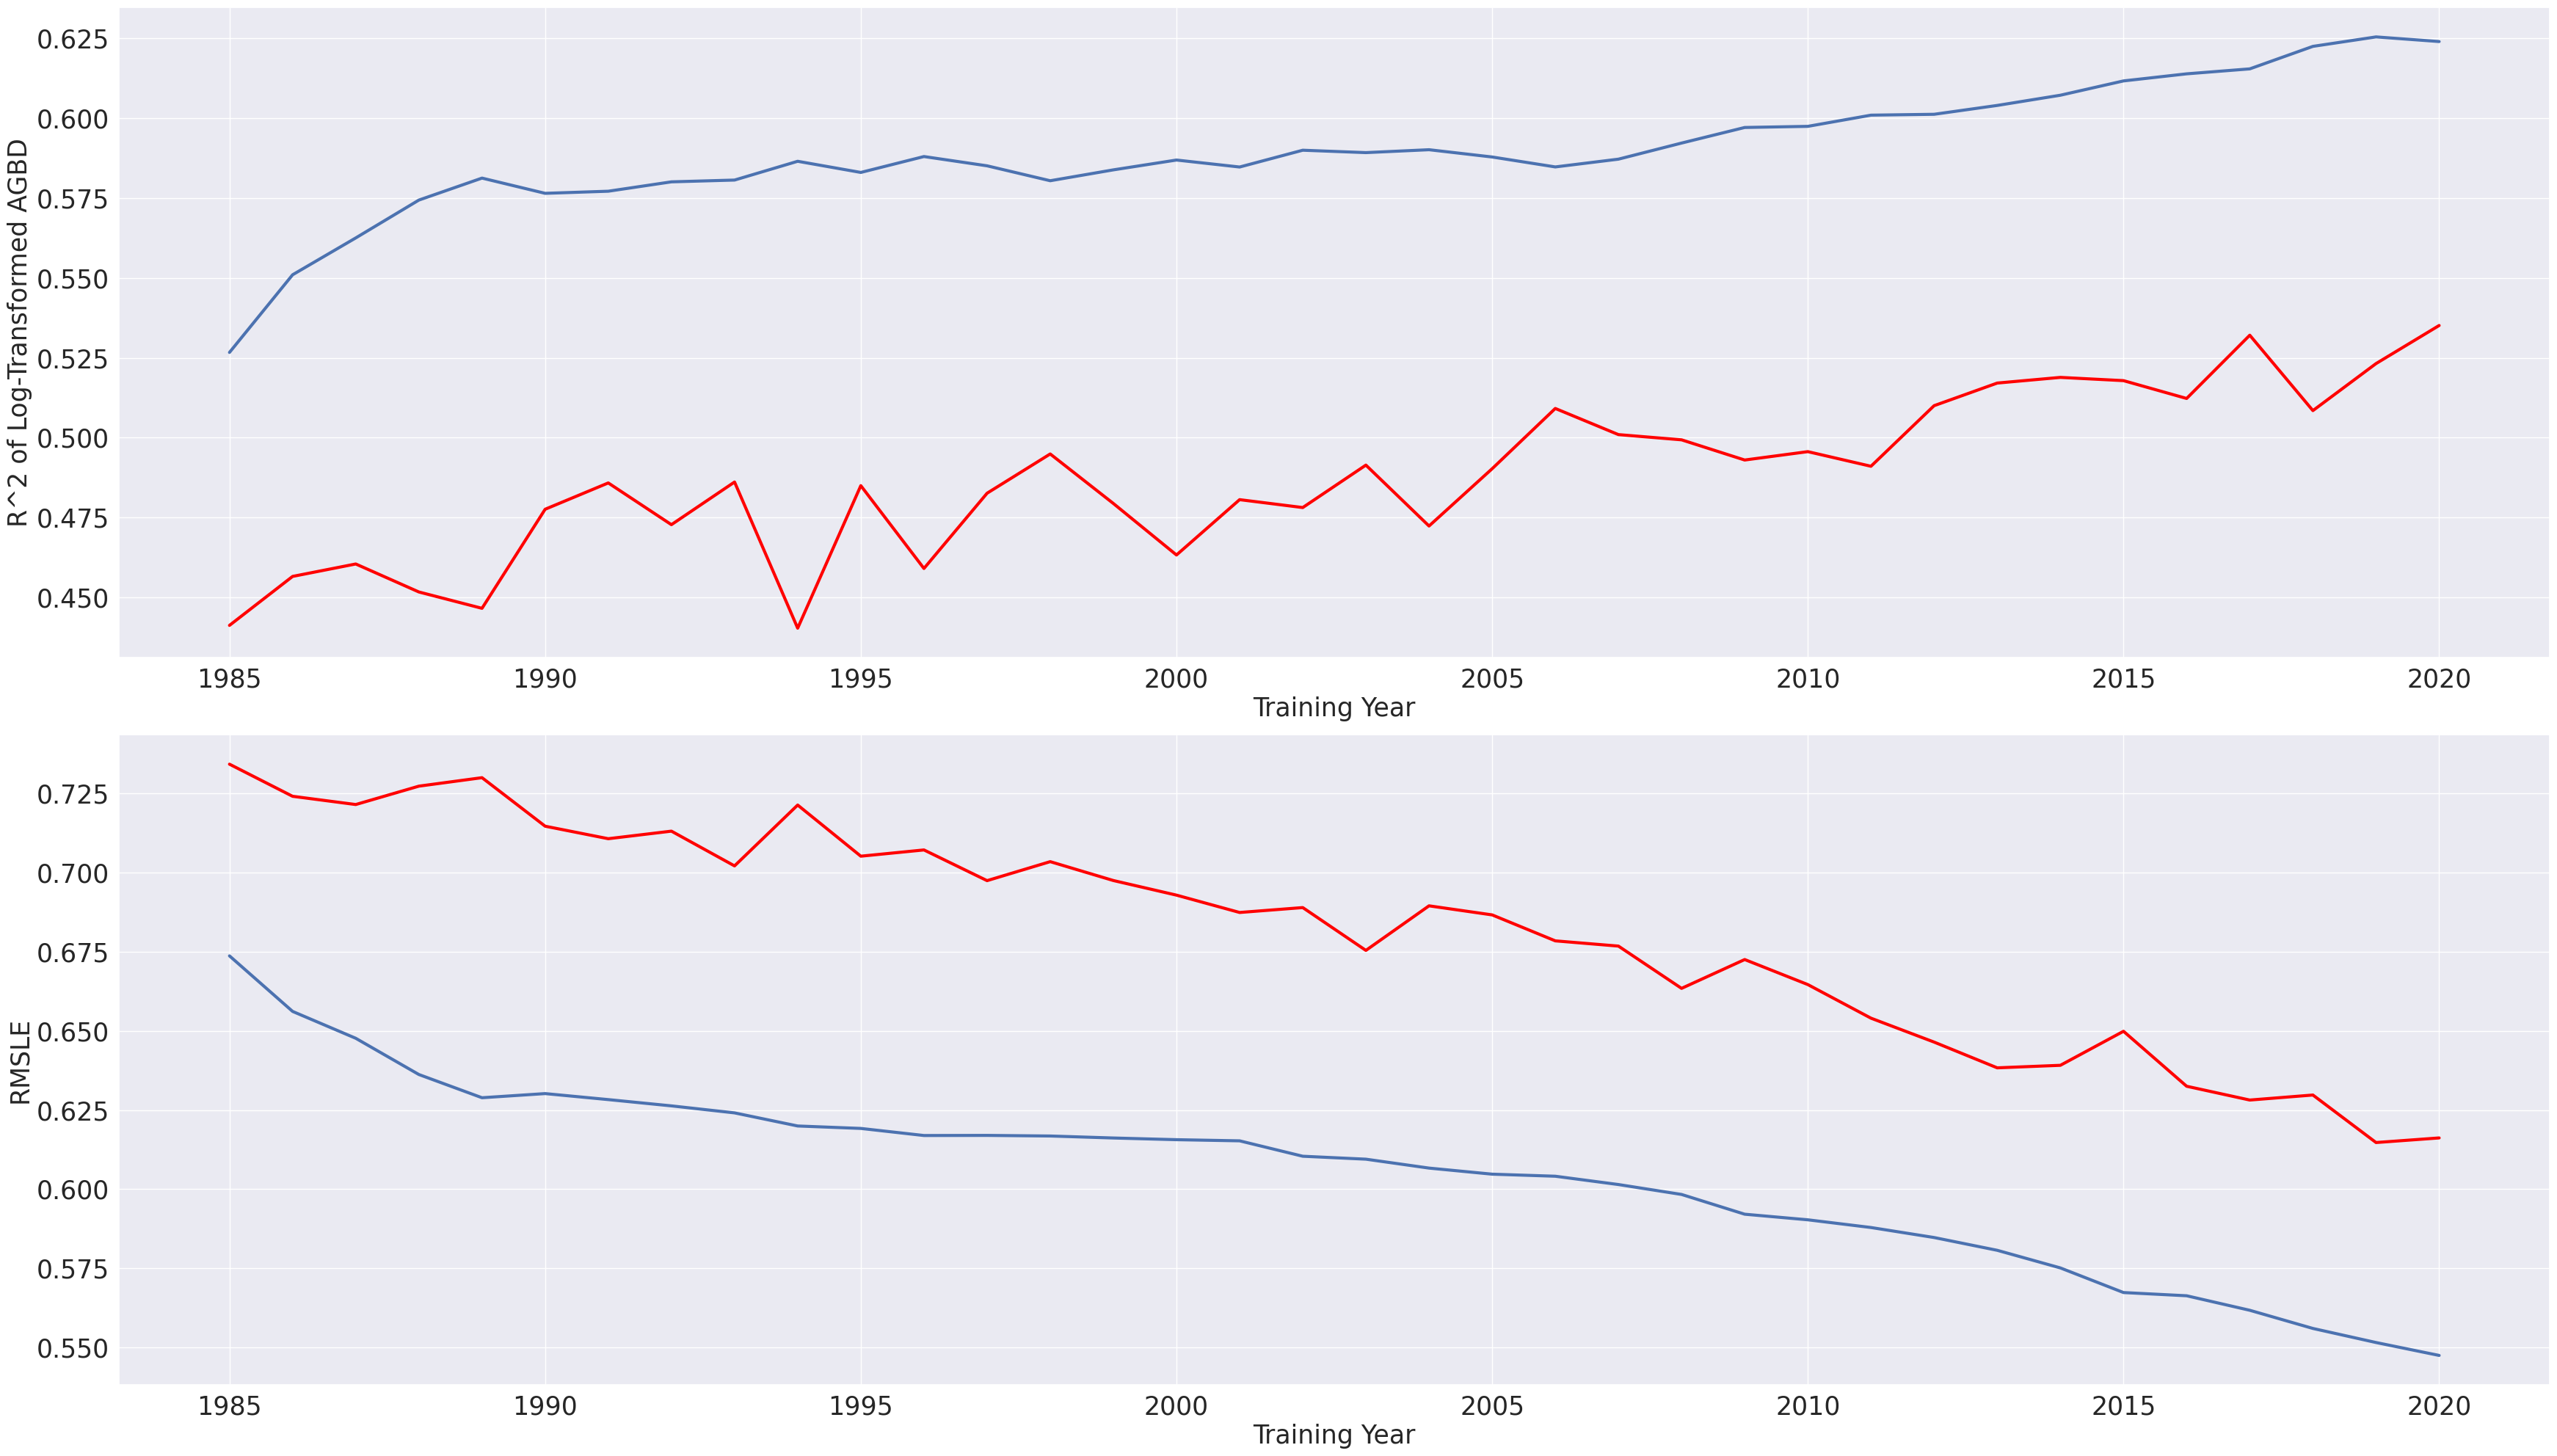

In [54]:
import seaborn as sns 
sns.set_theme()

fig, ax = plt.subplots(2, 1, figsize=(35, 20))
sns.lineplot(training_error, ax=ax[0], linewidth=3)
sns.lineplot(test_error, ax=ax[0], color="red", linewidth=3)

ticks_loc = ax[0].get_xticks().tolist()
print(ticks_loc)

ax[0].set_xticklabels([str(x) for x in range(1980, 2021, 5)])
ax[0].set_ylabel("R^2 of Log-Transformed AGBD", fontsize=25)
ax[0].set_xlabel("Training Year", fontsize=25)
ax[0].tick_params(axis="both", labelsize=25)


sns.lineplot(training_error_rmse, ax=ax[1], linewidth=3)
sns.lineplot(test_error_rmse, ax=ax[1], color="red", linewidth=3)

ticks_loc = ax[1].get_xticks().tolist()
print(ticks_loc)
ax[1].set_xticklabels([str(x) for x in range(1980, 2021, 5)])
ax[1].set_ylabel("RMSLE", fontsize=25)
ax[1].set_xlabel("Training Year", fontsize=25)
ax[1].tick_params(axis="both", labelsize=25)

fig.tight_layout()